# **DELTA ELEMENT 2: TIME SERIES FORECASTING using MLPRegressor** 
explaing code of element 1 for generating the predictions on the test set.

This notebook is predominantly divided into two 3 sections
1. MLP Regressor model
2. Generating rolling predictions (with MLP regressor)
3. Grid Search (the derived hypermmaters are used to run the above models before submitting)

**In order ro be able to generate the rolling predictions, I had to combine the train and test datasets. I also created 3 lag feature of the target variable. This has been processed beforehand in excel and stored as a new .csv file named 'Train_Test_Time_Series.csv'**

In [449]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score, mean_absolute_error, mean_squared_error, explained_variance_score
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification

# **Data processing**

In [450]:
df = pd.read_csv('Train_Test_Time_Series.csv')
df.set_index('Date',inplace=True)

In [451]:
columns_to_drop = ['Lag_1', 'Lag_2', 'Lag_3', 'Trading Volume (Target Variable)']
X_df = df.drop(columns=columns_to_drop)
y_df = df[['Trading Volume (Target Variable)']]

X_df_columns_names = list(X_df)

**Scaling**

In [452]:
# Initialize the StandardScaler for scaling X
sc1 = StandardScaler()
sc2 = StandardScaler()

X_df_scaled = pd.DataFrame(sc1.fit_transform(X_df))
y_df_scaled = pd.DataFrame(sc2.fit_transform(y_df))

**Principle Component Analysis**

In [453]:
# Define the no. of components
pca = PCA(n_components=5)

# Fit the PCA model to the data and transform the data
X_df_scaled = pd.DataFrame(pca.fit_transform(X_df_scaled))

In [454]:
# Here I am manupulating the lag values of the feature to align them properly in the dataframe
sub_df = df.iloc[:, 320:323]
sub_df = sub_df.reset_index()
sub_df = sub_df.drop(columns=['Date'])
scaler2 = StandardScaler()
sub_df = pd.DataFrame(scaler2.fit_transform(sub_df),columns= sub_df.columns)

In [455]:
# Concatenate the scaled 320 features and lag values along columns (axis=1)
X_df_scaled = pd.concat([X_df_scaled, sub_df], axis=1)
X_df_scaled.columns = X_df_scaled.columns.astype(str)

# Section 1

**MODEL 1: MLP Regressor (in this model I will NOT be using the lagged values for training and prediction)**

In [456]:
# Data partioning
X_train_1 = X_df_scaled.iloc[:2103, :5]
X_test_1 = X_df_scaled.iloc[2103:, :5]
y_train_1 = y_df_scaled.iloc[:2103]
y_test_1 = y_df_scaled.iloc[2103:]

X_train_1.shape, X_test_1.shape, y_train_1.shape, y_test_1.shape

((2103, 5), (395, 5), (2103, 1), (395, 1))

In [457]:
y_train_1 = y_train_1.squeeze().to_numpy()

In [470]:
# Sklearn model ~ Specify configuration
model_1=MLPRegressor(
    hidden_layer_sizes=(50, 50),
    activation='tanh',
    alpha = 0.005681,
    solver= 'sgd',
    learning_rate='adaptive',
    shuffle=False,
    random_state=42,
    #learning_rate_init=0.0005,
    max_iter = 1500
)

**In this model, only 5 PCA components are used for training and prediction. No Lag values.**

In [471]:
# Model fit
model_1.fit(X_train_1, y_train_1)

MLPRegressor(activation='tanh', alpha=0.005681, hidden_layer_sizes=(50, 50),
             learning_rate='adaptive', max_iter=1500, random_state=42,
             shuffle=False, solver='sgd')

In [472]:
# Predictions
y_pred_1 = np.array(model_1.predict(X_test_1)).reshape(-1,1)

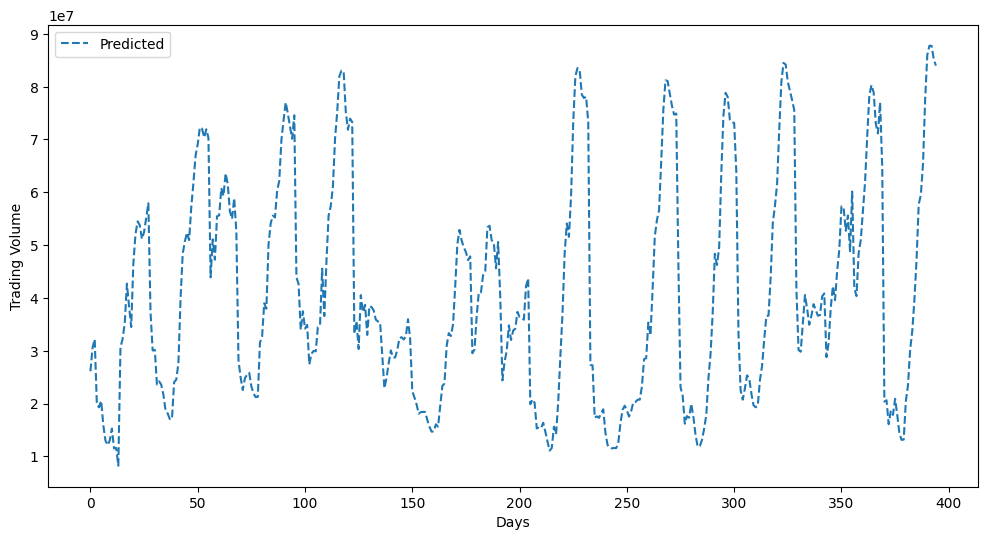

In [473]:
# Visualize Predictions
plt.figure(figsize=(12, 6))
#plt.plot(sc2.inverse_transform(y_test_1), label='Actual')
plt.plot(sc2.inverse_transform(y_pred_1), label='Predicted', linestyle='--')
plt.xlabel('Days')
plt.ylabel('Trading Volume')
plt.legend()
plt.show()

**Performance measures**
Snce the predictions have been generated on an unlabelled test set, these measures cannot be calculated. Hence I have commented them in this notebook.

In [476]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Mean Absolute Error
# mae = mean_absolute_error(y_test_1, y_pred_1)
# print(f"MAE: {mae:.2f}")

# # Mean Squared Error (MSE)
# mse = mean_squared_error(y_test_1, y_pred_1)
# print(f"MSE: {mse:.2f}")

# # Root Mean Squared Error (RMSE)
# rmse = np.sqrt(mean_squared_error(y_test_1, y_pred_1))
# print(f"RMSE: {rmse:.2f}")

# #R-squared (Coefficient of Determination)
# r2 = r2_score(y_test_1, y_pred_1)
# print(f"R-squared: {r2:.2f}")

# Section 2

**Model 2: Perform Rolling Predictions (with MLP regressor). This uses the Lag values of the feature for training and prediction.**

This was not able to generate sensible predictins during Element 1 submission. However laeter on I was able to wokk onit to be able to generate right predictions.

In [477]:
# Data partition. Here I hhad to start from the 4th row as the 1st three had missing values in he lag columns
X_train_2 = X_df_scaled.iloc[3:2000]
X_test_2 = X_df_scaled.iloc[2000:]
y_train_2 = y_df_scaled.iloc[3:2000]
y_test_2 = y_df_scaled.iloc[2000:]

X_train_2.shape, X_test_2.shape, y_train_2.shape, y_test_2.shape

((1997, 8), (498, 8), (1997, 1), (498, 1))

In [478]:
y_train_2 = y_train_2.squeeze().to_numpy()

In [479]:
# from sklearn.ensemble import RandomForestRegressor
# model_2 = RandomForestRegressor(n_estimators=150, n_jobs=-1)

In [480]:
#Sklearn model ~ Specify configuration
model_2 = MLPRegressor(
    hidden_layer_sizes=(50,50),
    activation='tanh',
    alpha = 0.005681,
    solver='sgd',
    shuffle=False,
    max_iter = 1500,
    learning_rate = 'adaptive',
    learning_rate_init=0.0005,
    random_state = 42
)

In [481]:
#Model fit
model_2.fit(X_train_2, y_train_2)

MLPRegressor(activation='tanh', alpha=0.005681, hidden_layer_sizes=(50, 50),
             learning_rate='adaptive', learning_rate_init=0.0005, max_iter=1500,
             random_state=42, shuffle=False, solver='sgd')

In [482]:
p = model_2.predict(X_test_2.iloc[2,:].values.reshape(1,-1))
scaler2.transform(np.array([p,p,p]).reshape(1,-1))[0]

C:\Users\Diya\anaconda3\envs\DELTA\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\Diya\anaconda3\envs\DELTA\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([-0.86456712, -0.86456712, -0.86456712])

In [483]:
# In the cell, the it predicts the first time step from test column, appends it to the dataset so as to be used as the lag value for the next prediction, asd so on.
predictions = []

for i in range (len(current_X_test)):
    # Predict the next value
    pred = model_2.predict(current_X_test.iloc[i,:].values.reshape(1,-1))
    predictions.append(pred[0])
    scaled_pred = scaler2.transform(np.array([pred[0],pred[0],pred[0]]).reshape(1,-1))[0]
    if i+1 < len(current_X_test) :#and pd.isna(current_X_test.iloc[i+1,-3]) :
        current_X_test.iloc[i + 1, current_X_test.columns.get_loc('Lag_1')] = scaled_pred[0]
    if i+2 < len(current_X_test):# and pd.isna(current_X_test.iloc[i+2,-2]):
        current_X_test.iloc[i + 2, current_X_test.columns.get_loc('Lag_2')] = scaled_pred[1]
    if i+3 < len(current_X_test):# and pd.isna(current_X_test.iloc[i+3,-1]):
        current_X_test.iloc[i + 3, current_X_test.columns.get_loc('Lag_3')] = scaled_pred[2]
predictions = pd.Series(predictions)
y_pred_2 = np.array(predictions).reshape(-1,1)

# Evaluate predictions
print(predictions)

C:\Users\Diya\anaconda3\envs\DELTA\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\Diya\anaconda3\envs\DELTA\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Diya\anaconda3\envs\DELTA\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\Diya\anaconda3\envs\DELTA\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Diya\anaconda3\envs\DELTA\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\Diya\anaconda3\envs\DELTA\Lib\site-packages\skl

0     -0.321047
1     -0.568937
2     -0.567769
3     -0.618817
4     -0.569255
         ...   
493   -0.216522
494   -0.129156
495   -0.095001
496    0.064737
497    0.112495
Length: 498, dtype: float64


C:\Users\Diya\anaconda3\envs\DELTA\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\Diya\anaconda3\envs\DELTA\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Diya\anaconda3\envs\DELTA\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\Diya\anaconda3\envs\DELTA\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Diya\anaconda3\envs\DELTA\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPRegressor was fitted with feature names
  warnings.warn(
C:\Users\Diya\anaconda3\envs\DELTA\Lib\site-packages\skl

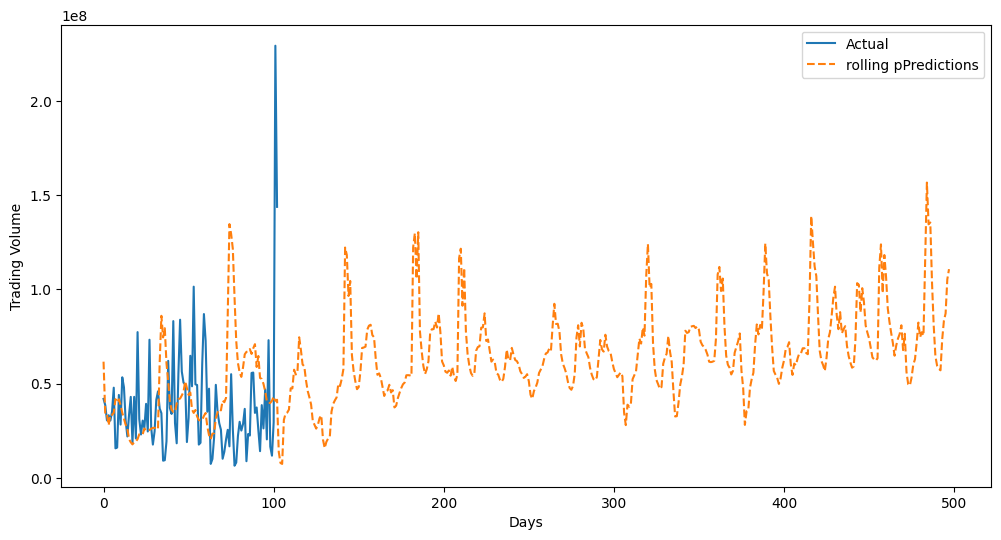

In [484]:
# Visualize Predictions
plt.figure(figsize=(12, 6))
plt.plot(sc2.inverse_transform(y_test_2), label='Actual')
plt.plot(sc2.inverse_transform(y_pred_2), label='rolling pPredictions', linestyle='--')
plt.xlabel('Days')
plt.ylabel('Trading Volume')
plt.legend()
plt.show()

# Section 3

**Grid Search**

In [443]:
# Defining the grid and the MLPRegressor model
param_grid= {
    'hidden_layer_sizes': [(50,), (100,), (50,25), (100,50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate_init': [0.001, 0.01, 0.05]
}

mlp = MLPRegressor(max_iter=1000, random_state=42)

In [446]:
#Define scoring functions
scoring = {
    'r2_score': make_scorer(r2_score),
    'neg_mean_absolute_error': make_scorer(mean_absolute_error, greater_is_better=False),
    'neg_mean_squared_error': make_scorer(mean_squared_error, greater_is_better=False),
    'explained_variance': make_scorer(explained_variance_score)
}

# Perform grid search
grid_search = GridSearchCV(estimator=mlp, 
                            param_grid=param_grid,
                            scoring=scoring,
                            refit='r2_score')
grid_search.fit(X_train_2,y_train_2)

C:\Users\Diya\anaconda3\envs\DELTA\Lib\site-packages\sklearn\neural_network\_base.py:173: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
C:\Users\Diya\anaconda3\envs\DELTA\Lib\site-packages\sklearn\utils\extmath.py:208: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Diya\anaconda3\envs\DELTA\Lib\site-packages\sklearn\utils\extmath.py:208: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
C:\Users\Diya\anaconda3\envs\DELTA\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Diya\anaconda3\envs\DELTA\Lib\site-packages\sklearn\utils\extmath.py:208: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
C:\Users\Diya\anaconda3\envs\DELTA\Lib\site-packages\sklearn\utils\extmath.py:208: RuntimeWarning: invalid value encountered in matmul
  r

GridSearchCV(estimator=MLPRegressor(max_iter=1000, random_state=42),
             param_grid={'activation': ['relu', 'tanh'],
                         'hidden_layer_sizes': [(50,), (100,), (50, 25),
                                                (100, 50)],
                         'learning_rate_init': [0.001, 0.01, 0.05],
                         'solver': ['adam', 'sgd']},
             refit='r2_score',
             scoring={'explained_variance': make_scorer(explained_variance_score, response_method='predict'),
                      'neg_mean_absolute_error': make_scorer(mean_absolute_error, greater_is_better=False, response_method='predict'),
                      'neg_mean_squared_error': make_scorer(mean_squared_error, greater_is_better=False, response_method='predict'),
                      'r2_score': make_scorer(r2_score, response_method='predict')})

In [447]:
#Step 3
# See/Find the best parameters
print('Best r2 Score: ',grid_search.best_score_)
print('Best parameters: ',grid_search.best_params_)
best_model=grid_search.best_estimator_

Best r2 Score:  -0.7380910498776545
Best parameters:  {'activation': 'tanh', 'hidden_layer_sizes': (100, 50), 'learning_rate_init': 0.001, 'solver': 'sgd'}
